In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('/content/breast_cancer_data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Explore the Data

In [2]:
df.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

In [3]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [4]:
df["diagnosis"].unique()

array(['M', 'B'], dtype=object)

In [5]:
df = df.drop('id', axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
counts = df['diagnosis'].value_counts()
print(counts)

B    357
M    212
Name: diagnosis, dtype: int64


Split the Data

In [7]:
#independent variables
X = df.drop('diagnosis', axis=1).copy()
print(X.shape)

#dependent variable
y = df['diagnosis'].copy()
print(y.shape)

(569, 30)
(569,)


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Classifier

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
classes = df['diagnosis'].unique().tolist()
print(classes)

['M', 'B']


[Text(0.6145833333333334, 0.9375, 'concavity_mean <= 0.051\ngini = 0.467\nsamples = 455\nvalue = [286, 169]\nclass = Malignant'),
 Text(0.3958333333333333, 0.8125, 'fractal_dimension_se <= 16.83\ngini = 0.107\nsamples = 282\nvalue = [266, 16]\nclass = Malignant'),
 Text(0.2916666666666667, 0.6875, 'perimeter_se <= 48.7\ngini = 0.037\nsamples = 263\nvalue = [258, 5]\nclass = Malignant'),
 Text(0.20833333333333334, 0.5625, 'area_worst <= 0.178\ngini = 0.023\nsamples = 260\nvalue = [257, 3]\nclass = Malignant'),
 Text(0.16666666666666666, 0.4375, 'area_se <= 0.003\ngini = 0.015\nsamples = 259\nvalue = [257, 2]\nclass = Malignant'),
 Text(0.08333333333333333, 0.3125, 'radius_worst <= 27.755\ngini = 0.245\nsamples = 7\nvalue = [6, 1]\nclass = Malignant'),
 Text(0.041666666666666664, 0.1875, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = Malignant'),
 Text(0.125, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Benign'),
 Text(0.25, 0.3125, 'radius_worst <= 33.35\ngini = 0.008\ns

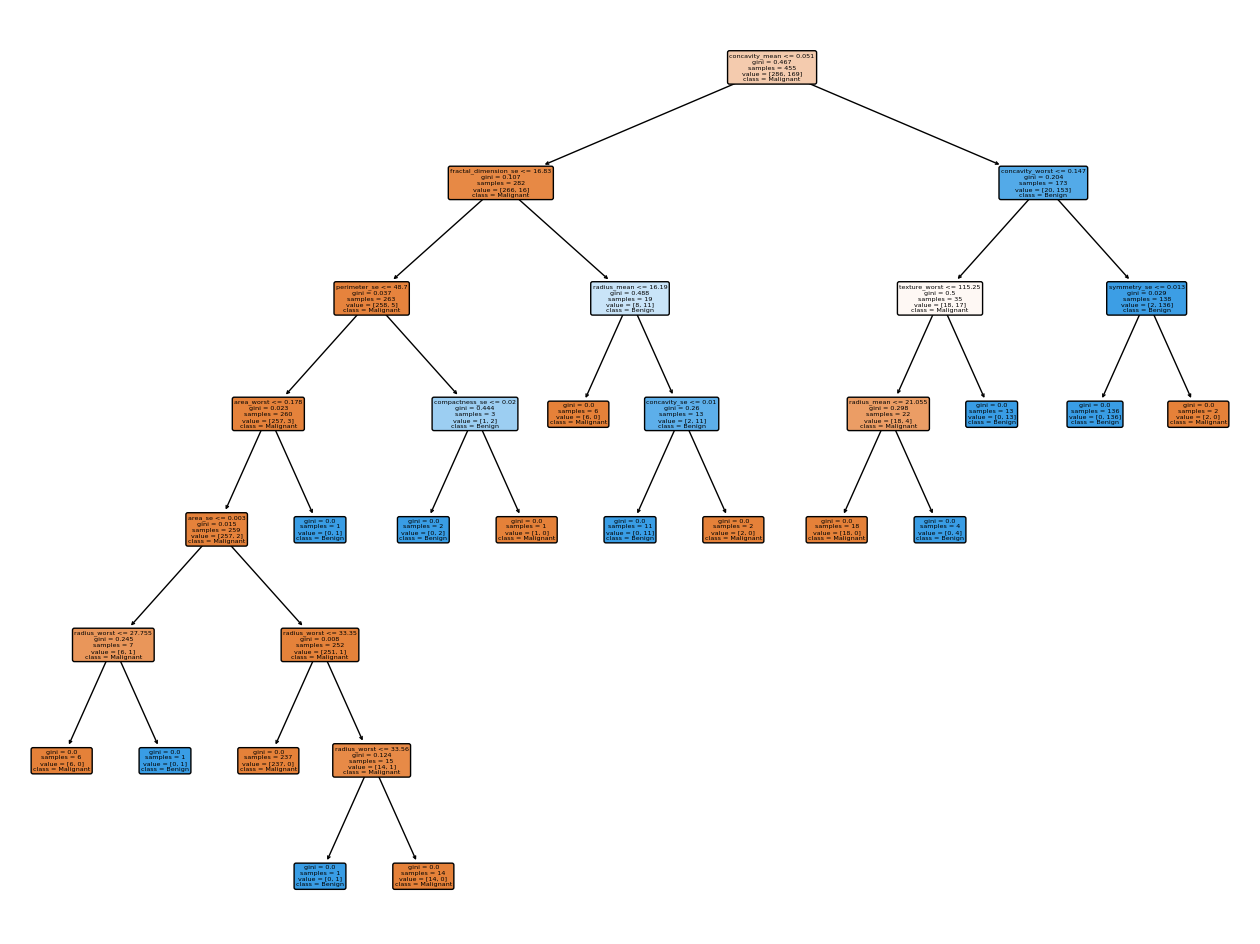

In [11]:
plt.figure(figsize=(16,12))
plot_tree(clf,filled=True,rounded=True,class_names=["Malignant","Benign"],feature_names=df.columns)

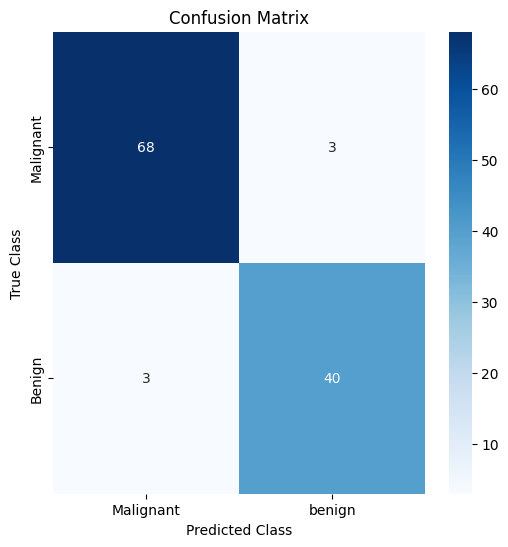

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Use the decision tree to make predictions on the test set
y_pred_DT = clf.predict(X_test)

# Visualize the confusion matrix of the decision tree on the test set
conf_mat = confusion_matrix(y_test, y_pred_DT)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt="d", xticklabels=["Malignant", "benign"], yticklabels=["Malignant", "Benign"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluation metrics : accuracy, precision, recall, F1-score, roc_auc
acc_score_DT = accuracy_score(y_test,y_pred_DT)
prcs_score_DT = precision_score(y_test,y_pred_DT,pos_label="M")
rec_score_DT = recall_score(y_test, y_pred_DT, pos_label='M')
f1_score_DT = f1_score(y_test, y_pred_DT, pos_label='M')



Data Ranges, Outliers Detection and Removal, Data Normalization

In [14]:
ranges = []

# Iterate through columns from the second to the last one
for col in df.columns[1:-1]:
    # Compute the range of values in the column
    col_range = [df[col].min(), df[col].max()]
    # Append the range to the list
    ranges.append(col_range)

# Print the list of ranges
print(ranges)


[[6.981, 28.11], [9.71, 39.28], [43.79, 188.5], [143.5, 2501.0], [0.05263, 0.1634], [0.01938, 0.3454], [0.0, 0.4268], [0.0, 0.2012], [0.106, 0.304], [0.04996, 0.09744], [0.1115, 2.873], [0.3602, 4.885], [0.757, 21.98], [6.802, 542.2], [0.001713, 0.03113], [0.002252, 0.1354], [0.0, 0.396], [0.0, 0.05279], [0.007882, 0.07895], [0.0008948, 0.02984], [7.93, 36.04], [12.02, 49.54], [50.41, 251.2], [185.2, 4254.0], [0.07117, 0.2226], [0.02729, 1.058], [0.0, 1.252], [0.0, 0.291], [0.1565, 0.6638]]


In [15]:
# calculate the Z-score for each column
df_zscore = df.iloc[:,1:-1].apply(lambda x: (x - x.mean()) / x.std())

# print the first few rows of the Z-score dataframe
df_zscore.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,0.906286,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.099356,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,0.293301,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,2.045711,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,0.498889,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590


In [16]:
# create a filter for values with Z-score greater than 3 or less than -3
zscore_filter = df_zscore.apply(lambda x: (x > 3) | (x < -3))

# count the number of outliers in each column
outlier_counts = zscore_filter.sum()

# print the number of outliers in each column
print(outlier_counts)

radius_mean                5
texture_mean               4
perimeter_mean             7
area_mean                  8
smoothness_mean            5
compactness_mean           9
concavity_mean             9
concave points_mean        6
symmetry_mean              5
fractal_dimension_mean     7
radius_se                  7
texture_se                 9
perimeter_se               8
area_se                    6
smoothness_se              7
compactness_se            12
concavity_se               6
concave points_se          6
symmetry_se               11
fractal_dimension_se      10
radius_worst               6
texture_worst              4
perimeter_worst            6
area_worst                10
smoothness_worst           3
compactness_worst         10
concavity_worst            7
concave points_worst       0
symmetry_worst             9
dtype: int64


In [17]:
# remove rows with outlier values
df_filtered = df[~zscore_filter.any(axis=1)]
# shape of data
print(df_filtered.shape)

(495, 31)


In [18]:
df = df_filtered

from sklearn.preprocessing import MinMaxScaler

# create the scaler object
scaler = MinMaxScaler()


# select the columns to normalize
cols_to_normalize = df.columns[1:-1]


# fit and transform the data using the scaler object
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

# create a new dataframe from the normalized data
df = pd.DataFrame(df)


# print the first few rows of the normalized dataframe
df.head()

<ipython-input-18-4f425ea243c0>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,M,0.834244,0.383627,0.822731,0.766613,0.298029,0.283514,0.273787,0.449232,0.469774,...,0.842053,0.384927,0.745000,0.798449,0.388053,0.241722,0.284604,0.688634,0.371706,0.08902
2,M,0.780220,0.549262,0.795956,0.686872,0.631318,0.672280,0.621928,0.818822,0.656956,...,0.771964,0.456573,0.701698,0.687077,0.575923,0.619353,0.530569,0.899667,0.642409,0.08758
4,M,0.817054,0.220371,0.843043,0.747812,0.506636,0.542627,0.623819,0.667734,0.467589,...,0.721125,0.157148,0.699636,0.626657,0.512084,0.270929,0.471198,0.601629,0.250627,0.07678
5,M,0.335748,0.285102,0.358046,0.216272,0.875318,0.720601,0.497164,0.517862,0.670066,...,0.372162,0.396418,0.364217,0.250879,0.892385,0.778723,0.630816,0.644576,0.759097,0.12440
6,M,0.691817,0.488815,0.699935,0.581199,0.430621,0.428763,0.355072,0.473752,0.456664,...,0.737907,0.528557,0.706509,0.640635,0.574099,0.354424,0.445753,0.715291,0.469887,0.08368


K Nearest Neighbors

In [19]:
#independent variables
X = df.drop('diagnosis', axis=1).copy()
print(X.shape)

#dependent variable
y = df['diagnosis'].copy()
print(y.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(495, 30)
(495,)


best k is 3


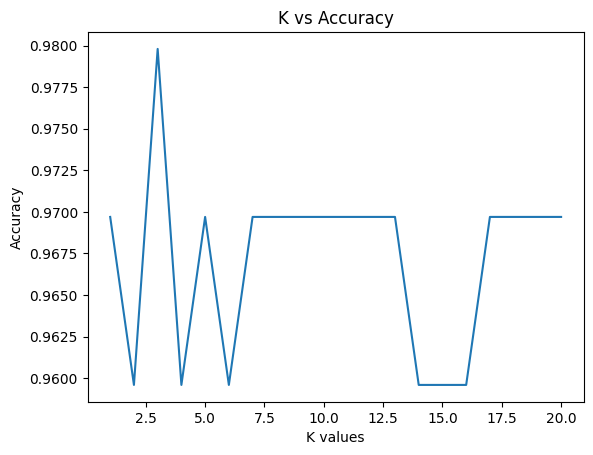

In [22]:
from sklearn.neighbors import KNeighborsClassifier

# Define the range of k values
k_values = list(range(1, 21))

# Find the best value of k using grid search and evaluate its performance

k_values = list(range(1, 21))
accuracies = []
best_accuracy = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = sum(y_pred == y_test) / len(y_test)
    accuracies.append(accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k
  
print(f"best k is {best_k}")

plt.plot(k_values, accuracies)
plt.xlabel('K values')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy')
plt.show()


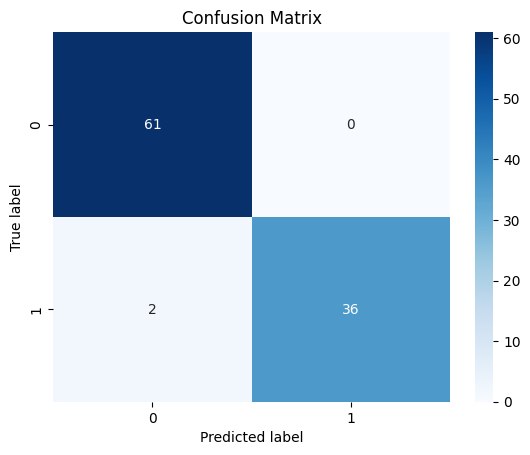

In [23]:
# Train the final model using the best value of k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train, y_train)
y_pred_KNN = final_knn.predict(X_test)

# Visualize the model using a confusion matrix
cm = confusion_matrix(y_test, y_pred_KNN)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Evaluation metrics : accuracy, precision, recall, F1-score, roc_auc
acc_score_KNN = accuracy_score(y_test,y_pred_KNN)
prcs_score_KNN = precision_score(y_test,y_pred_KNN,pos_label="M")
rec_score_KNN = recall_score(y_test, y_pred_KNN, pos_label='M')
f1_score_KNN = f1_score(y_test, y_pred_KNN, pos_label='M')

Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

# Instantiate a logistic regression object
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_LogR = logreg.predict(X_test)

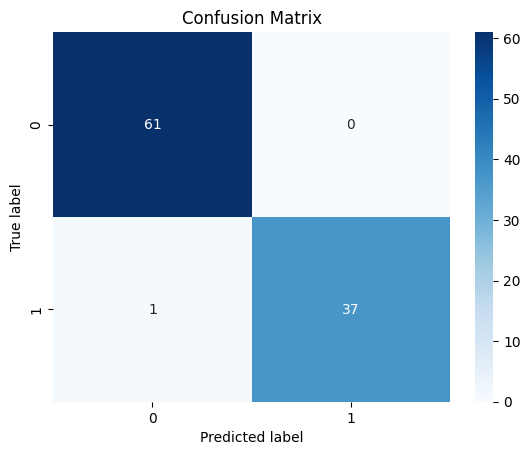

In [26]:
# Visualize the model using a confusion matrix
cm = confusion_matrix(y_test, y_pred_LogR)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Evaluation metrics : accuracy, precision, recall, F1-score, roc_auc
acc_score_LogR = accuracy_score(y_test,y_pred_LogR)
prcs_score_LogR = precision_score(y_test,y_pred_LogR,pos_label="M")
rec_score_LogR = recall_score(y_test, y_pred_LogR, pos_label='M')
f1_score_LogR = f1_score(y_test, y_pred_LogR, pos_label='M')

Models Comparision

In [28]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "Accuracy Score", "Precision Score", "Recall Score", "F1 Score"]

table.add_row(["Decision Tree for Classification",acc_score_DT, prcs_score_DT,rec_score_DT,f1_score_DT])
table.add_row(["K Nearest Neighbors",acc_score_KNN, prcs_score_KNN,rec_score_KNN,f1_score_KNN])
table.add_row(["Logistic Regression",acc_score_LogR, prcs_score_LogR,rec_score_LogR,f1_score_LogR])

print("Comparison of models\n")
print(table)
     

Comparison of models

+----------------------------------+--------------------+--------------------+--------------------+--------------------+
|              Model               |   Accuracy Score   |  Precision Score   |    Recall Score    |      F1 Score      |
+----------------------------------+--------------------+--------------------+--------------------+--------------------+
| Decision Tree for Classification | 0.9473684210526315 | 0.9302325581395349 | 0.9302325581395349 | 0.9302325581395349 |
|       K Nearest Neighbors        | 0.9797979797979798 |        1.0         | 0.9473684210526315 | 0.972972972972973  |
|       Logistic Regression        |  0.98989898989899  |        1.0         | 0.9736842105263158 | 0.9866666666666666 |
+----------------------------------+--------------------+--------------------+--------------------+--------------------+
